# Final Exam

### __Introduction__
Congratulations you've landed a data science job at Riot Games (https://en.wikipedia.org/wiki/Riot_Games) whether you know what they do or not.

Riot makes several games including the extremely popular online game League of Legends (https://en.wikipedia.org/wiki/League_of_Legends). You've been assigned to the League of Legends team to help analyze their data.

*From here on we will refer to League of Legends as just "League".

### __Background__

_In the game, two teams of five players battle in player-versus-player combat, each team occupying and defending their half of the map. Each of the ten players controls a character, known as a "champion", with unique abilities and differing styles of play. During a match, champions become more powerful by collecting experience points, earning gold, and purchasing items to defeat the opposing team. In League's main mode, Summoner's Rift, a team wins by pushing through to the enemy base and destroying their "Nexus", a large structure located within._ (wikipedia)

The two teams are the red team and the blue team.

In League there are different "tiers" of players called "leagues". New and unskilled players (sorry) are in __Bronze__ league while relatively skilled players are in __Diamond__ league.

*we will refer to a player in diamond league as a diamond player and a player in bronze league as a bronze player

### __Your job__
Investigate the differences between bronze players and diamond players. Presumably, bronze players and diamond players will play the game somewhat differently due to their relative skill difference. However, we dont expect there to be huge differences since bronze players may try to imitate diamond players in order to get better at the gane.

We want to know
1. Are there are any systematic differences in the way bronze players and diamond players approach the game?
2. Do bronze league games and diamond league games play out the same?

### __Data__
There are 8 provided datasets. Each row of each dataset records information from one match up to a certain point time (15, 20, 25, or 30 minutes)

For example
 - `timeline_DIAMOND_15.csv` contains match data up to 15 minutes into the game for diamond players.
 - `timeline_BRONZE_30.csv` contains match data up to 30 minutes into the game for bronze players.

We will be using all datasets to look at differences between bronze and diamond players over the course of the game.

### __Task__

Using the provided data we will compare the gameplay of bronze and diamond players at five stages of the game.
1. Stage 1 is the 15 minute mark
2. Stage 2 is the 20 minute mark
2. Stage 3 is the 25 minute mark
2. Stage 4 is the 30 minute mark

We will try to discover how features differ between the two groups and which features are important to predicting the winner of the game.


### __Rules__
This exam works much like the homework. Code everything that is asked of you and fill in any boxes where it asks for your commentary or opinion.

This exam has two parts
1. Manipule and plot data. Draw conclusions.
2. Build classification models. Compare them. Draw conclusions.

Guidelines
- You may use your notes, old homeworks, google, etc.
- You may not ask your friends for help
- If you see `...` that indicates you need to fill something in or write code.
- Run all code chunks before submitting. Make sure the output is unambigious.
- When you are finished re-upload to Canvas.

glhf



# STAT 335 FINAL Project
## Drew Kearny, Ben Yeates, Eric Schillinger

In [ ]:
# standard imports

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
# score classifiers

from sklearn.preprocessing import OneHotEncoder
def brier_score(targets, probs):
  enc = OneHotEncoder()
  target_enc = enc.fit_transform(np.array(targets).reshape(-1, 1)).toarray()
  return np.mean(np.sum((probs - target_enc)**2, axis=1))

def log_score(targets, probs):
  enc = OneHotEncoder()
  target_enc = enc.fit_transform(np.array(targets).reshape(-1, 1)).toarray()
  return -np.mean(np.sum(target_enc * np.log(probs + 1e-32), axis=1))

# Question 1 -- Exploratory Analysis

Lets assume we dont know anything about league. We have never played the game, never seen anyone play it, and maybe we haven't even heard of it. Thats okay, we can still analyze the data and try to learn something.


First things first, we want to do some exploratory analysis. This will help us identify consistent trends between bronze and diamond players and become familiar with the data.

In [ ]:
# as always change the drive to your drive

from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/STAT335/

Mounted at /content/drive
[Errno 2] No such file or directory: '/content/drive/MyDrive/STAT335/'
/content


## Part a [10 pts]

Through a little investigation you find out there are some key metrics people keep track of to tell whos currently winning. We will look at three of them here.

1. The amount of "xp" earned by each team.  A team with more "xp" is typically stronger than a team with less "xp". Basically more xp is better.
2. The amount of "gold" earned by each team. A team with more gold typically has better equipment than a team with less gold. Basically more gold is better.
3. The number of "wards" placed by each team. A team with more wards can react to the opposing team better. Basically more wards is better.


Using the data available up to 15 minutes in the game, compare the distribution of xp, gold, and wards for bronze and diamond players.

1. Create 9 subfigures in a 3x3 grid (done for you). Fill in the provided template with the appropriate variables.
2. The column names (variables) you will need are: blue_gold, red_gold, gold_diff, blue_xp, red_xp, xp_diff, blue_ward_placed, red_ward_placed, ward_placed_diff. These variables record the amount of gold, xp, and wards each team (red or blue) has and the difference.
3. In each subfigure plot two histograms: one for diamond players and one for bronze players. Make each histogram transparent (alpha = 0.5) since they will overlap. Label each histogram.
4. Comment on any similarities or differences between the two histograms (within each subfigure) and any differences you notice overall between diamond and bronze players. Make sure to answer: Do bronze or diamond players tend to have more xp, gold, and wards (for either team)? Is there any systematic difference between red and blue team (for either diamond or bronze)? Use summary measures like the mean or median to quantify your response. Briefly argue these points, a simple "yes" or "no" is insufficient.



In [ ]:
#bronze15 contains bronze league match data up to 15 minutes into the game
bronze15 = pd.read_csv('/content/timeline_BRONZE_15.csv', index_col = 0)

#diamond15 contains diamond league match data up to 15 minutes into the game
diamond15 = pd.read_csv('/content/timeline_DIAMOND_15.csv', index_col = 0)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# check column names (should be the same for both datasets)
bronze15.columns

Index(['duration', 'blue_gold', 'red_gold', 'gold_diff', 'blue_xp', 'red_xp',
       'xp_diff', 'blue_ward_placed', 'red_ward_placed', 'ward_placed_diff',
       'blue_ward_destroyed', 'red_ward_destroyed', 'ward_destroyed_diff',
       'first_blood', 'blue_kills', 'red_kills', 'kill_diff', 'first_turret',
       'blue_turrets', 'red_turrets', 'turret_diff', 'first_inhibitor',
       'blue_inhibitors', 'red_inhibitors', 'inhibitor_diff', 'first_herald',
       'blue_heralds', 'red_heralds', 'herald_diff', 'first_baron',
       'blue_barons', 'red_barons', 'baron_diff', 'blue_air', 'red_air',
       'air_diff', 'blue_hextech', 'red_hextech', 'hextech_diff', 'blue_fire',
       'red_fire', 'fire_diff', 'blue_earth', 'red_earth', 'earth_diff',
       'blue_water', 'red_water', 'water_diff', 'air', 'hextech', 'fire',
       'earth', 'water', 'blue_win'],
      dtype='object')

In [ ]:
diamond15.columns

Index(['duration', 'blue_gold', 'red_gold', 'gold_diff', 'blue_xp', 'red_xp',
       'xp_diff', 'blue_ward_placed', 'red_ward_placed', 'ward_placed_diff',
       'blue_ward_destroyed', 'red_ward_destroyed', 'ward_destroyed_diff',
       'first_blood', 'blue_kills', 'red_kills', 'kill_diff', 'first_turret',
       'blue_turrets', 'red_turrets', 'turret_diff', 'first_inhibitor',
       'blue_inhibitors', 'red_inhibitors', 'inhibitor_diff', 'first_herald',
       'blue_heralds', 'red_heralds', 'herald_diff', 'first_baron',
       'blue_barons', 'red_barons', 'baron_diff', 'blue_air', 'red_air',
       'air_diff', 'blue_hextech', 'red_hextech', 'hextech_diff', 'blue_fire',
       'red_fire', 'fire_diff', 'blue_earth', 'red_earth', 'earth_diff',
       'blue_water', 'red_water', 'water_diff', 'air', 'hextech', 'fire',
       'earth', 'water', 'blue_win'],
      dtype='object')

In [ ]:
# Calculating mean and median for each variable in bronze and diamond datasets
variables = ['blue_gold', 'red_gold', 'gold_diff', 'blue_xp', 'red_xp', 'xp_diff', 'blue_ward_placed', 'red_ward_placed', 'ward_placed_diff']

for var in variables:
    bronze_mean = bronze15[var].mean()
    bronze_median = bronze15[var].median()
    diamond_mean = diamond15[var].mean()
    diamond_median = diamond15[var].median()

    print(f"{var} - Bronze Mean: {bronze_mean}, Bronze Median: {bronze_median}, Diamond Mean: {diamond_mean}, Diamond Median: {diamond_median}")


blue_gold - Bronze Mean: 24741.49777649576, Bronze Median: 24589.0, Diamond Mean: 27233.557711515667, Diamond Median: 27051.0
red_gold - Bronze Mean: 24619.929064205186, Bronze Median: 24446.0, Diamond Mean: 27106.277777037914, Diamond Median: 26931.0
gold_diff - Bronze Mean: 121.56871229056993, Bronze Median: 148.0, Diamond Mean: 127.27993447775307, Diamond Median: 143.0
blue_xp - Bronze Mean: 28264.027210884353, Bronze Median: 28329.0, Diamond Mean: 29783.161781352796, Diamond Median: 29791.0
red_xp - Bronze Mean: 28237.312853056417, Bronze Median: 28281.0, Diamond Mean: 29813.33818535338, Diamond Median: 29832.0
xp_diff - Bronze Mean: 26.71435782793683, Bronze Median: 30.0, Diamond Mean: -30.176404000585972, Diamond Median: -34.0
blue_ward_placed - Bronze Mean: 23.1431455974616, Bronze Median: 23.0, Diamond Mean: 25.19301096032708, Diamond Median: 25.0
red_ward_placed - Bronze Mean: 22.87783947501262, Bronze Median: 22.0, Diamond Mean: 25.089547070809306, Diamond Median: 25.0
ward_p

In [ ]:
# Finding the amount of data points in each dataset
num_points_bronze15 = bronze15.shape[0]
num_points_diamond15 = diamond15.shape[0]

print("Data points in each dataset:")
print(f"Bronze 15 minutes: {num_points_bronze15}")
print(f"Diamond 15 minutes: {num_points_diamond15}")

Data points in each dataset:
Bronze 15 minutes: 41601
Diamond 15 minutes: 75089


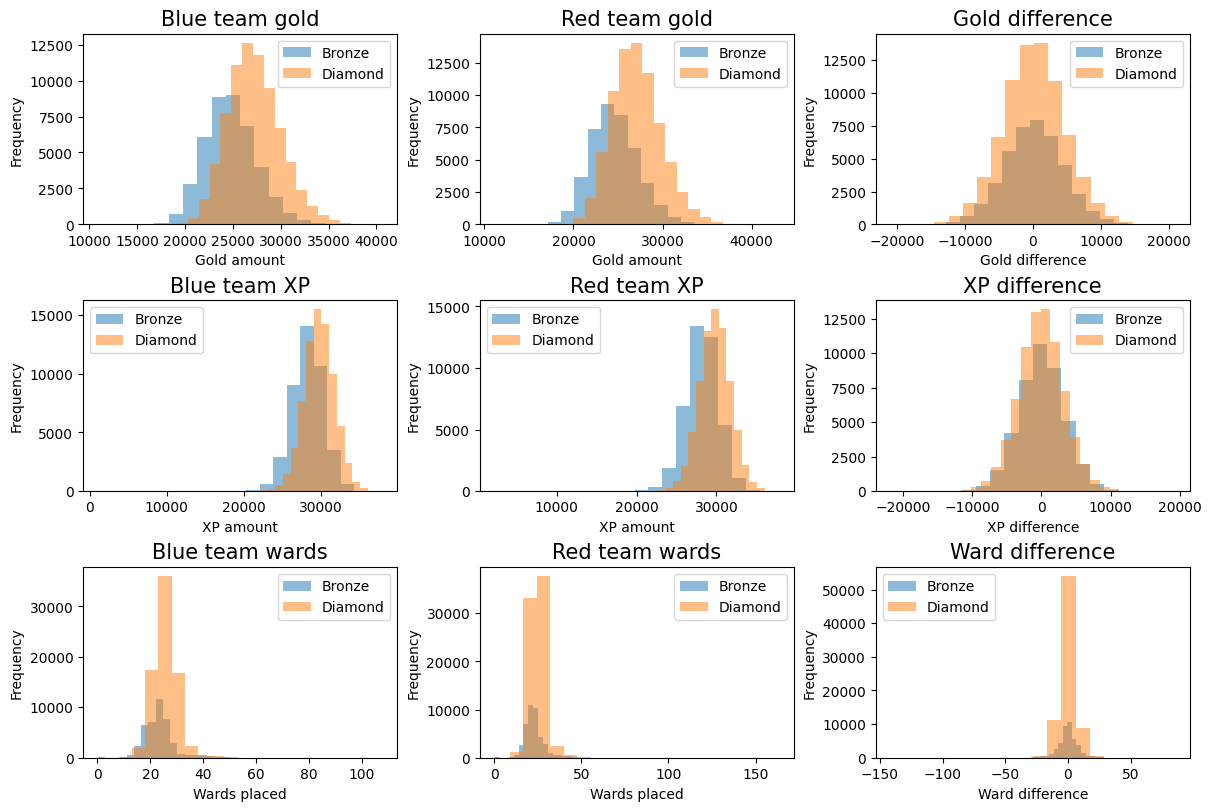

In [ ]:
fig, ax = plt.subplots(3, 3, constrained_layout = True, figsize = (12, 8))

# gold histograms
# Blue team gold
ax[0,0].hist(bronze15['blue_gold'], alpha=0.5, label='Bronze', bins=20)
ax[0,0].hist(diamond15['blue_gold'], alpha=0.5, label='Diamond', bins=20)
ax[0,0].set_title('Blue team gold', fontsize=15)
ax[0,0].set_xlabel('Gold amount')
ax[0,0].set_ylabel('Frequency')
ax[0,0].legend()

# Red team gold
ax[0,1].hist(bronze15['red_gold'], alpha=0.5, label='Bronze', bins=20)
ax[0,1].hist(diamond15['red_gold'], alpha=0.5, label='Diamond', bins=20)
ax[0,1].set_title('Red team gold', fontsize=15)
ax[0,1].set_xlabel('Gold amount')
ax[0,1].set_ylabel('Frequency')
ax[0,1].legend()

# Gold difference
ax[0,2].hist(bronze15['gold_diff'], alpha=0.5, label='Bronze', bins=20)
ax[0,2].hist(diamond15['gold_diff'], alpha=0.5, label='Diamond', bins=20)
ax[0,2].set_title('Gold difference', fontsize=15)
ax[0,2].set_xlabel('Gold difference')
ax[0,2].set_ylabel('Frequency')
ax[0,2].legend()

# XP histograms
# Blue team XP
ax[1,0].hist(bronze15['blue_xp'], alpha=0.5, label='Bronze', bins=20)
ax[1,0].hist(diamond15['blue_xp'], alpha=0.5, label='Diamond', bins=20)
ax[1,0].set_title('Blue team XP', fontsize=15)
ax[1,0].set_xlabel('XP amount')
ax[1,0].set_ylabel('Frequency')
ax[1,0].legend()

# Red team XP
ax[1,1].hist(bronze15['red_xp'], alpha=0.5, label='Bronze', bins=20)
ax[1,1].hist(diamond15['red_xp'], alpha=0.5, label='Diamond', bins=20)
ax[1,1].set_title('Red team XP', fontsize=15)
ax[1,1].set_xlabel('XP amount')
ax[1,1].set_ylabel('Frequency')
ax[1,1].legend()

# XP difference
ax[1,2].hist(bronze15['xp_diff'], alpha=0.5, label='Bronze', bins=20)
ax[1,2].hist(diamond15['xp_diff'], alpha=0.5, label='Diamond', bins=20)
ax[1,2].set_title('XP difference', fontsize=15)
ax[1,2].set_xlabel('XP difference')
ax[1,2].set_ylabel('Frequency')
ax[1,2].legend()

# Ward histograms
# Blue team wards
ax[2,0].hist(bronze15['blue_ward_placed'], alpha=0.5, label='Bronze', bins=20)
ax[2,0].hist(diamond15['blue_ward_placed'], alpha=0.5, label='Diamond', bins=20)
ax[2,0].set_title('Blue team wards', fontsize=15)
ax[2,0].set_xlabel('Wards placed')
ax[2,0].set_ylabel('Frequency')
ax[2,0].legend()

# Red team wards
ax[2,1].hist(bronze15['red_ward_placed'], alpha=0.5, label='Bronze', bins=20)
ax[2,1].hist(diamond15['red_ward_placed'], alpha=0.5, label='Diamond', bins=20)
ax[2,1].set_title('Red team wards', fontsize=15)
ax[2,1].set_xlabel('Wards placed')
ax[2,1].set_ylabel('Frequency')
ax[2,1].legend()

# Ward difference
ax[2,2].hist(bronze15['ward_placed_diff'], alpha=0.5, label='Bronze', bins=20)
ax[2,2].hist(diamond15['ward_placed_diff'], alpha=0.5, label='Diamond', bins=20)
ax[2,2].set_title('Ward difference', fontsize=15)
ax[2,2].set_xlabel('Ward difference')
ax[2,2].set_ylabel('Frequency')
ax[2,2].legend()

plt.show()

The first takeaway from the histograms is that there is no extreme systematic difference between the red and blue teams for any variable. There is slight differences between the distributions for red and blue teams, but we can see from the plots that the summary statistics displayed above the mean, median, and spread of the data does not change much for the Bronze and Diamond Leagues when we compare red to blue teams. Also when you look at the histograms of the differences we see all 3 plots are very close to being normally distributed about 0, with the mean and median being very close to zero for all plots. However, the blue team does have slightly higher numbers for mean and median gold, XP, and Wards for both Bronze and Diamond players so there is potential evidence that the Blue team wins more than the Red Team and we should see if this is true later.

When looking at the difference between Bronze and Diamond level players there is a significant difference in the levels of XP, Gold, and Wards that they have. The Diamond players clearly tend to have higher gold at the 15 minute mark with a mean and median roughly 2500 Gold higher than the Bronze players, the Diamond players also clearly tend to have more XP at the 15 minute mark with a mean and median about 1500 XP higher than the Bronze players, and the Diamond players clearly tend to have more Wards at the 15 minute wark with a mean and median about 2 wards higher. So the Diamond players are clearly doing better in the game at the 15 minute mark than the Bronze players.

One final takeway was that we have a sample of 75089 diamond players at 15 minutes and only 41601 Bronze Players at 15 minutes. While this likely won't be an issue in finding meaningful takeaways it is something to keep in kind for a potential skewing of data.

## Part b  [10 pts]

We suspect that the amount of gold earned may be the most important variable.
Lets compare the gold distribution across match lengths for bronze and diamond players.

In [ ]:
diamond15 = pd.read_csv('/content/timeline_DIAMOND_15.csv', index_col = 0)
diamond20 = pd.read_csv('/content/timeline_DIAMOND_20.csv', index_col = 0)
diamond25 = pd.read_csv('/content/timeline_DIAMOND_25.csv', index_col = 0)
diamond30 = pd.read_csv('/content/timeline_DIAMOND_30 (1).csv', index_col = 0)

bronze15 = pd.read_csv('/content/timeline_BRONZE_15.csv', index_col = 0)
bronze20 = pd.read_csv('/content/timeline_BRONZE_20.csv', index_col = 0)
bronze25 = pd.read_csv('/content/timeline_BRONZE_25.csv', index_col = 0)
bronze30 = pd.read_csv('/content/timeline_BRONZE_30.csv', index_col = 0)

Using the data available up to 15, 20, 25 and 30 minutes into the game, compare the distribution of gold for bronze and diamond players.

1. Create 12 subfigures in a 4x3 grid (done for you). Fill in the provided template with the appropriate variables.
2. The column names (variables) you will need are: blue_gold, red_gold, gold_diff
3. In each subfigure plot two histograms: one for diamond players and one for bronze players. Make each histogram transparent (alpha = 0.5) since they will overlap. Label the histograms.
5. Create table that clearly displays the mean of each histogram for each of the twelve subfigures. The table should be 12x3, each row is a subfigure, column 1 contains the title of the subfigure, column 2 contains the bronze mean, and column 3 contains the diamond mean.
4. Comment on any similarities or differences between the two histograms (within each subfigure) and any differences you notice overall between diamond and bronze players.  Make sure to answer: Do bronze or diamond players tend to have more gold (for either team)? Does the gap between bronze and diamond grow with match length? Is there any systematic difference between red and blue team (for either diamond or bronze)? Use summary measures like the mean or median to quantify your response. Briefly argue these points, a simple "yes" or "no" is insufficient.



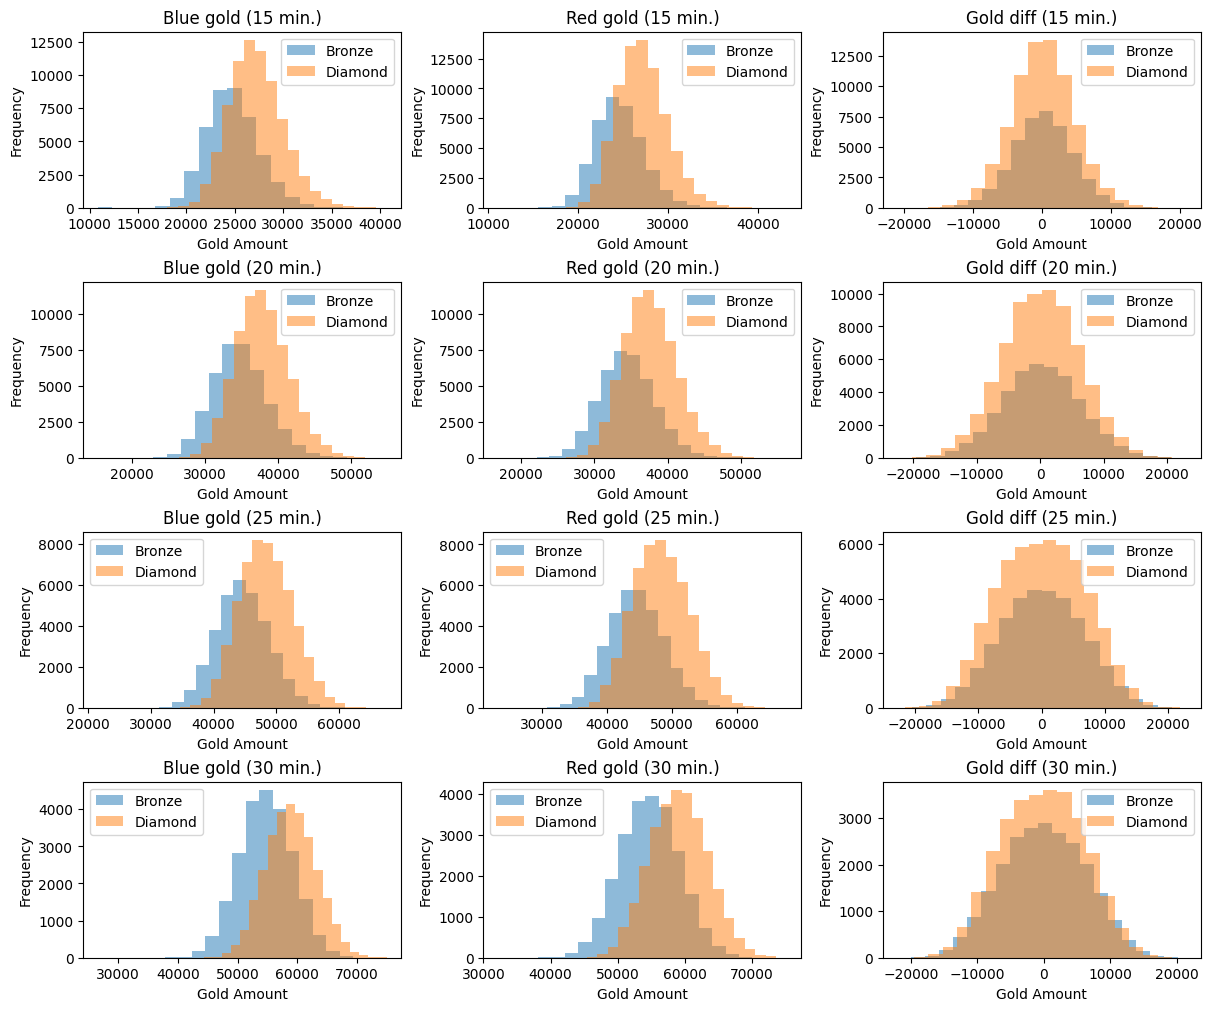

In [ ]:
fig, ax = plt.subplots(4, 3, constrained_layout = True, figsize = (12, 10))
x_label = 'Gold Amount'
y_label = 'Frequency'

# Gold histograms (15 min)
# Blue gold (15 min.)
ax[0,0].hist(bronze15['blue_gold'], alpha=0.5, label='Bronze', bins=20)
ax[0,0].hist(diamond15['blue_gold'], alpha=0.5, label='Diamond', bins=20)
ax[0,0].set_title('Blue gold (15 min.)')
ax[0,0].set_xlabel(x_label)
ax[0,0].set_ylabel(y_label)
ax[0,0].legend()

# Red gold (15 min.)
ax[0,1].hist(bronze15['red_gold'], alpha=0.5, label='Bronze', bins=20)
ax[0,1].hist(diamond15['red_gold'], alpha=0.5, label='Diamond', bins=20)
ax[0,1].set_title('Red gold (15 min.)')
ax[0,1].set_xlabel(x_label)
ax[0,1].set_ylabel(y_label)
ax[0,1].legend()

# Gold diff (15 min.)
ax[0,2].hist(bronze15['gold_diff'], alpha=0.5, label='Bronze', bins=20)
ax[0,2].hist(diamond15['gold_diff'], alpha=0.5, label='Diamond', bins=20)
ax[0,2].set_title('Gold diff (15 min.)')
ax[0,2].set_xlabel(x_label)
ax[0,2].set_ylabel(y_label)
ax[0,2].legend()

# Gold histograms (20 min)
# Blue gold (20 min.)
ax[1,0].hist(bronze20['blue_gold'], alpha=0.5, label='Bronze', bins=20)
ax[1,0].hist(diamond20['blue_gold'], alpha=0.5, label='Diamond', bins=20)
ax[1,0].set_title('Blue gold (20 min.)')
ax[1,0].set_xlabel(x_label)
ax[1,0].set_ylabel(y_label)
ax[1,0].legend()

# Red gold (20 min.)
ax[1,1].hist(bronze20['red_gold'], alpha=0.5, label='Bronze', bins=20)
ax[1,1].hist(diamond20['red_gold'], alpha=0.5, label='Diamond', bins=20)
ax[1,1].set_title('Red gold (20 min.)')
ax[1,1].set_xlabel(x_label)
ax[1,1].set_ylabel(y_label)
ax[1,1].legend()

# Gold diff (20 min.)
ax[1,2].hist(bronze20['gold_diff'], alpha=0.5, label='Bronze', bins=20)
ax[1,2].hist(diamond20['gold_diff'], alpha=0.5, label='Diamond', bins=20)
ax[1,2].set_title('Gold diff (20 min.)')
ax[1,2].set_xlabel(x_label)
ax[1,2].set_ylabel(y_label)
ax[1,2].legend()

# Gold histograms (25 min)
# Blue gold (25 min.)
ax[2,0].hist(bronze25['blue_gold'], alpha=0.5, label='Bronze', bins=20)
ax[2,0].hist(diamond25['blue_gold'], alpha=0.5, label='Diamond', bins=20)
ax[2,0].set_title('Blue gold (25 min.)')
ax[2,0].set_xlabel(x_label)
ax[2,0].set_ylabel(y_label)
ax[2,0].legend()

# Red gold (25 min.)
ax[2,1].hist(bronze25['red_gold'], alpha=0.5, label='Bronze', bins=20)
ax[2,1].hist(diamond25['red_gold'], alpha=0.5, label='Diamond', bins=20)
ax[2,1].set_title('Red gold (25 min.)')
ax[2,1].set_xlabel(x_label)
ax[2,1].set_ylabel(y_label)
ax[2,1].legend()

# Gold diff (25 min.)
ax[2,2].hist(bronze25['gold_diff'], alpha=0.5, label='Bronze', bins=20)
ax[2,2].hist(diamond25['gold_diff'], alpha=0.5, label='Diamond', bins=20)
ax[2,2].set_title('Gold diff (25 min.)')
ax[2,2].set_xlabel(x_label)
ax[2,2].set_ylabel(y_label)
ax[2,2].legend()

# Gold histograms (30 min)
# Blue gold (30 min.)
ax[3,0].hist(bronze30['blue_gold'], alpha=0.5, label='Bronze', bins=20)
ax[3,0].hist(diamond30['blue_gold'], alpha=0.5, label='Diamond', bins=20)
ax[3,0].set_title('Blue gold (30 min.)')
ax[3,0].set_xlabel(x_label)
ax[3,0].set_ylabel(y_label)
ax[3,0].legend()

# Red gold (30 min.)
ax[3,1].hist(bronze30['red_gold'], alpha=0.5, label='Bronze', bins=20)
ax[3,1].hist(diamond30['red_gold'], alpha=0.5, label='Diamond', bins=20)
ax[3,1].set_title('Red gold (30 min.)')
ax[3,1].set_xlabel(x_label)
ax[3,1].set_ylabel(y_label)
ax[3,1].legend()

# Gold diff (30 min.)
ax[3,2].hist(bronze30['gold_diff'], alpha=0.5, label='Bronze', bins=20)
ax[3,2].hist(diamond30['gold_diff'], alpha=0.5, label='Diamond', bins=20)
ax[3,2].set_title('Gold diff (30 min.)')
ax[3,2].set_xlabel(x_label)
ax[3,2].set_ylabel(y_label)
ax[3,2].legend()

plt.show()

In [ ]:
# create table
datasets = {
    '15 min': {'bronze': bronze15, 'diamond': diamond15},
    '20 min': {'bronze': bronze20, 'diamond': diamond20},
    '25 min': {'bronze': bronze25, 'diamond': diamond25},
    '30 min': {'bronze': bronze30, 'diamond': diamond30}
}

# Variables
variables = ['blue_gold', 'red_gold', 'gold_diff']

table_data = []

# Calculate means and populate the table data
for time, data in datasets.items():
    for var in variables:
        bronze_mean = data['bronze'][var].mean()
        diamond_mean = data['diamond'][var].mean()
        table_data.append([f'{var} ({time})', bronze_mean, diamond_mean])

# Create a DataFrame for the table
table = pd.DataFrame(table_data, columns=['Histogram (Match Length)', 'Bronze Mean', 'Diamond Mean'])

# Display the table
print(table)

   Histogram (Match Length)   Bronze Mean  Diamond Mean
0        blue_gold (15 min)  24741.497776  27233.557712
1         red_gold (15 min)  24619.929064  27106.277777
2        gold_diff (15 min)    121.568712    127.279934
3        blue_gold (20 min)  34690.530151  37820.458150
4         red_gold (20 min)  34509.430812  37697.718769
5        gold_diff (20 min)    181.099339    122.739381
6        blue_gold (25 min)  44605.701921  48392.694304
7         red_gold (25 min)  44481.136954  48380.779924
8        gold_diff (25 min)    124.564967     11.914380
9        blue_gold (30 min)  54729.310733  58955.282586
10        red_gold (30 min)  54755.995345  59113.174376
11       gold_diff (30 min)    -26.684612   -157.891789


In [ ]:
# Number of data points in each data set
num_points_bronze15 = bronze15.shape[0]
num_points_bronze20 = bronze20.shape[0]
num_points_bronze25 = bronze25.shape[0]
num_points_bronze30 = bronze30.shape[0]

num_points_diamond15 = diamond15.shape[0]
num_points_diamond20 = diamond20.shape[0]
num_points_diamond25 = diamond25.shape[0]
num_points_diamond30 = diamond30.shape[0]
print("Data points in each dataset:")
print(f"Bronze 15 minutes: {num_points_bronze15}")
print(f"Bronze 20 minutes: {num_points_bronze20}")
print(f"Bronze 25 minutes: {num_points_bronze25}")
print(f"Bronze 30 minutes: {num_points_bronze30}")
print(f"Diamond 15 minutes: {num_points_diamond15}")
print(f"Diamond 20 minutes: {num_points_diamond20}")
print(f"Diamond 25 minutes: {num_points_diamond25}")
print(f"Diamond 30 minutes: {num_points_diamond30}")

Data points in each dataset:
Bronze 15 minutes: 41601
Bronze 20 minutes: 39783
Bronze 25 minutes: 33471
Bronze 30 minutes: 23200
Diamond 15 minutes: 75089
Diamond 20 minutes: 71027
Diamond 25 minutes: 55022
Diamond 30 minutes: 29230


There appears to be no extreme systematic difference between red and blue teams because we can see that the distribution of gold for Bronze and Diamond players at each time length into the game has very little difference between red and blue. The difference histograms for red and blue teams are close to being normally distributed about a mean and median of close to 0 telling us the two teams gold distributions are not super different. However, the blue team does have a slightly higher mean amount of gold than the red team at each time length except for 30 minutes so its possible the blue team wins more than the red closer to the start of the match and we should check this later.

For each histogram for gold and blue teams we see that on average the Diamond players have more gold than the Bronze players at every match length and it can be seen that as the match length increases the gap in gold increase where the Diamond Players have more and more gold than the Bronze players on Average. For both red and blue teams, at 15 minutes into the game Diamond players have a mean amount of gold that is 2500 higher than Bronze, and then at 20 minutes Diamond players have a mean amount of gold that is just over 3000 higher than Bronze, at 25 minutes the Diamond players have a mean amount of gold that is close to 4000 higher than Bronze players, and at 30 minutes the Diamond players have a mean of gold that is over 4200 higher than Bronze Players. This pattern in the histograms and data table clearly tells that Diamond players tend to have more gold than Bronze players and the gap in gold between Diamond and Bronze players does grow on average as Diamond players have increasingly more gold.

One other thing that can be noticed is that it appears we have more data points for Diamond Players than Bronze players and this is confirmed by printing the shape for each dataset above. At each match length part we have more data on diamond players than Bronze which could is something to keep in mind for potential issues.

---

## Part c  [10 pts]

Maybe looking at winners and losers aggregated together isnt the best idea. Lets see how gold differences vary between winners and losers (over time and between bronze and diamond). Perhaps the gold accumulation and the gold lead (gold diff) is different for bronze and diamond players?

1. Create 8 subfigures in a 2x4 grid (done for you). Fill in the provided template with the appropriate variables.
2. The column names (variables) you will need are: blue_win, blue_gold, and gold_diff
3. In each subfigure plot two histograms: one for diamond players and one for bronze players only in the cases where blue team won (`blue_win == 1`). Make each histogram transparent (alpha = 0.5) since they will overlap. Label the histograms.
5. Create table that clearly displays the mean of each histogram for each of the eight subfigures. The table should be 8x3, each row is a subfigure, column 1 contains the title of the subfigure, column 2 contains the bronze mean, and column 3 contains the diamond mean.
4. Comment on any similarities or differences you notice overall between diamond and bronze players or over time. Make sure to answer: Does the gold advantage (average value of gold_diff) grow over time? Is there a difference between bronze and diamond players? I.e are diamond players typically "more ahead"? Use summary measures like the mean or median to quantify your response. Briefly argue these points, a simple "yes" or "no" is insufficient.


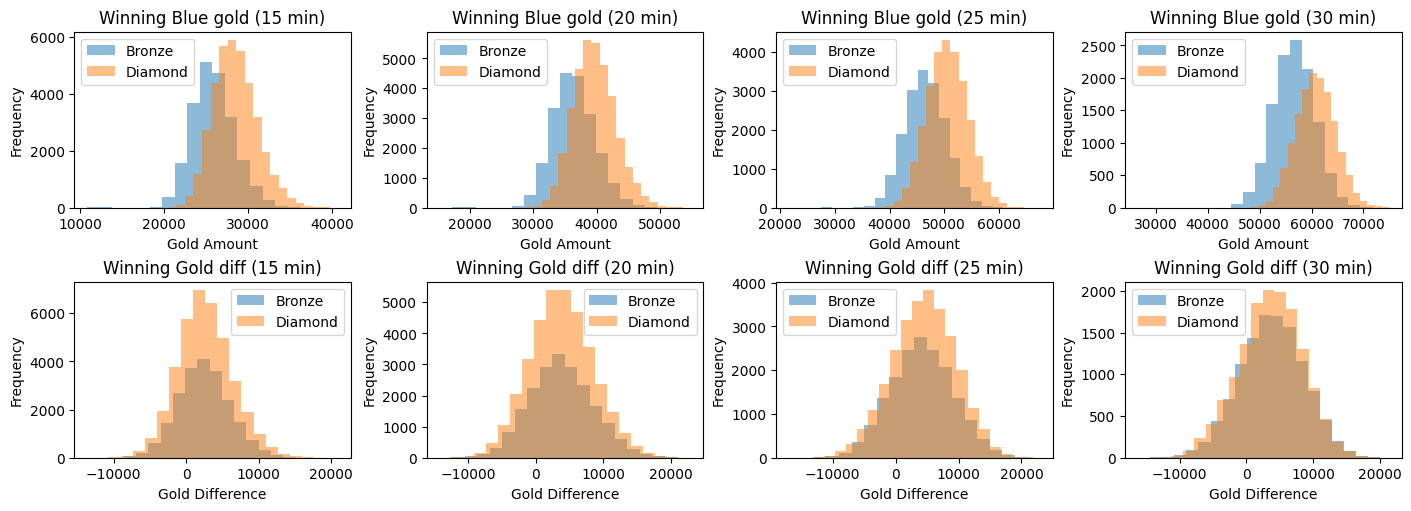

In [ ]:
fig, ax = plt.subplots(2, 4, constrained_layout = True, figsize = (14, 5))
x_gold = 'Gold Amount'
x_diff = 'Gold Difference'
y_label = 'Frequency'

# blue gold distribution (winners only)
# blue gold distribution (winners only) 15 min
ax[0,0].hist(bronze15[bronze15['blue_win'] == 1]['blue_gold'], alpha=0.5, label='Bronze', bins=20)
ax[0,0].hist(diamond15[diamond15['blue_win'] == 1]['blue_gold'], alpha=0.5, label='Diamond', bins=20)
ax[0,0].set_title('Winning Blue gold (15 min)')
ax[0,0].set_xlabel(x_gold)
ax[0,0].set_ylabel(y_label)
ax[0,0].legend()

# blue gold distribution (winners only) 20 min
ax[0,1].hist(bronze20[bronze20['blue_win'] == 1]['blue_gold'], alpha=0.5, label='Bronze', bins=20)
ax[0,1].hist(diamond20[diamond20['blue_win'] == 1]['blue_gold'], alpha=0.5, label='Diamond', bins=20)
ax[0,1].set_title('Winning Blue gold (20 min)')
ax[0,1].set_xlabel(x_gold)
ax[0,1].set_ylabel(y_label)
ax[0,1].legend()

# blue gold distribution (winners only) 25 min
ax[0,2].hist(bronze25[bronze25['blue_win'] == 1]['blue_gold'], alpha=0.5, label='Bronze', bins=20)
ax[0,2].hist(diamond25[diamond25['blue_win'] == 1]['blue_gold'], alpha=0.5, label='Diamond', bins=20)
ax[0,2].set_title('Winning Blue gold (25 min)')
ax[0,2].set_xlabel(x_gold)
ax[0,2].set_ylabel(y_label)
ax[0,2].legend()

# blue gold distribution (winners only) 30 min
ax[0,3].hist(bronze30[bronze30['blue_win'] == 1]['blue_gold'], alpha=0.5, label='Bronze', bins=20)
ax[0,3].hist(diamond30[diamond30['blue_win'] == 1]['blue_gold'], alpha=0.5, label='Diamond', bins=20)
ax[0,3].set_title('Winning Blue gold (30 min)')
ax[0,3].set_xlabel(x_gold)
ax[0,3].set_ylabel(y_label)
ax[0,3].legend()


# gold diff distribution (winners only)
# gold diff distribution (winners only) 15 min
ax[1,0].hist(bronze15[bronze15['blue_win'] == 1]['gold_diff'], alpha=0.5, label='Bronze', bins=20)
ax[1,0].hist(diamond15[diamond15['blue_win'] == 1]['gold_diff'], alpha=0.5, label='Diamond', bins=20)
ax[1,0].set_title('Winning Gold diff (15 min)')
ax[1,0].set_xlabel(x_diff)
ax[1,0].set_ylabel(y_label)
ax[1,0].legend()

# gold diff distribution (winners only) 20 min
ax[1,1].hist(bronze20[bronze20['blue_win'] == 1]['gold_diff'], alpha=0.5, label='Bronze', bins=20)
ax[1,1].hist(diamond20[diamond20['blue_win'] == 1]['gold_diff'], alpha=0.5, label='Diamond', bins=20)
ax[1,1].set_title('Winning Gold diff (20 min)')
ax[1,1].set_xlabel(x_diff)
ax[1,1].set_ylabel(y_label)
ax[1,1].legend()

# gold diff distribution (winners only) 25 min
ax[1,2].hist(bronze25[bronze25['blue_win'] == 1]['gold_diff'], alpha=0.5, label='Bronze', bins=20)
ax[1,2].hist(diamond25[diamond25['blue_win'] == 1]['gold_diff'], alpha=0.5, label='Diamond', bins=20)
ax[1,2].set_title('Winning Gold diff (25 min)')
ax[1,2].set_xlabel(x_diff)
ax[1,2].set_ylabel(y_label)
ax[1,2].legend()

# gold diff distribution (winners only) 30 min
ax[1,3].hist(bronze30[bronze30['blue_win'] == 1]['gold_diff'], alpha=0.5, label='Bronze', bins=20)
ax[1,3].hist(diamond30[diamond30['blue_win'] == 1]['gold_diff'], alpha=0.5, label='Diamond', bins=20)
ax[1,3].set_title('Winning Gold diff (30 min)')
ax[1,3].set_xlabel(x_diff)
ax[1,3].set_ylabel(y_label)
ax[1,3].legend()


plt.show()

In [ ]:
# create table
datasets = {
    '15 min': {'bronze': bronze15, 'diamond': diamond15},
    '20 min': {'bronze': bronze20, 'diamond': diamond20},
    '25 min': {'bronze': bronze25, 'diamond': diamond25},
    '30 min': {'bronze': bronze30, 'diamond': diamond30}
}

# Variables
variables = ['blue_gold', 'gold_diff']

table_data = []

# Calculate means and populate the table data
for time, data in datasets.items():
    for var in variables:
        bronze_mean = data['bronze'][data['bronze']['blue_win'] == 1][var].mean()
        diamond_mean = data['diamond'][data['diamond']['blue_win'] == 1][var].mean()
        table_data.append([f'Winning {var} ({time})', bronze_mean, diamond_mean])

# Create a DataFrame for the table
table2 = pd.DataFrame(table_data, columns=['Histogram (Match Length)', 'Bronze Mean', 'Diamond Mean'])

# Display the table
print(table2)

     Histogram (Match Length)   Bronze Mean  Diamond Mean
0  Winning blue_gold (15 min)  25893.674664  28483.645345
1  Winning gold_diff (15 min)   2455.904031   2621.463895
2  Winning blue_gold (20 min)  36465.827672  39664.889615
3  Winning gold_diff (20 min)   3776.496691   3807.514916
4  Winning blue_gold (25 min)  46604.352378  50621.178989
5  Winning gold_diff (25 min)   4197.648497   4506.325021
6  Winning blue_gold (30 min)  56632.105779  60831.249738
7  Winning gold_diff (30 min)   3830.244715   3659.378732


On average the amount of Gold that the winning team has is higher for the winning Diamond teams compared to the winning Bronnze teams for each match legnth. The mean amount of gold for the winning diamond team is about 2600 higher than Bronze at 15 minutes, about 3200 higher at 20 minutes, about 4000 higher at 25 minutes, and about 4200 higher at 30 minutes.

The difference in gold or the "gap" between the winning and losing team appears to grow over time for both bronze and diamond players between 15 and 25 minutes but then the average difference goes down between 25 and 30 minutes. The mean difference for bronze players goes from 2455 at 15 minutes, to 3776 at 20 minutes, then to 4197 at 25 minutes, and back down to 3830 at 30 minutes. The mean difference for the Diamond team goes from 2621 at 15 minutes, to 3807 at 20 minutes, then all the way up to 4506 at 25 minutes, and back down to 3659 at 30 minutes. These trends show that diamond players are typically slightly more ahead than bronze players after 15 and 20 minutes, and then the diamond plauers increase there lead by much more than Bronze players at the 25 minute mark, and then we actually see Bronze players have a larger lead on average at the 30 minute mark which is interesting.

## Part d  [10 pts]

There is a persistent belief that the blue team has an advantage, i.e. blue team wins more often than red team.

For each stage of the game (15, 20, 25, 30 minutes) and for both diamond and bronze players compute the win percentage of the blue team (fraction of times that blue_win == 1).

1. Plot two lines (label them) indicating the percent of the time blue wins. X-axis is match time (15, 20, 25, 30 minutes) and y-axis is win percentage of blue team.
2. One line shows the win percentage of blue for diamond players
3. The other line shows the win percentage of blue for bronze players
4. Label the axis and title the plot appropriately.
5. Comment on if there are any systematic similarities and differences between the two curves. Make sure to answer: Does blue team have an advantage (higher than 50% win percentage)? Is there a difference between diamond and bronze? Does the chance blue wins change over time? Briefly argue these points, a simple "yes" or "no" is insufficient.

In [ ]:
# Calculate win percentages
match_times = [15, 20, 25, 30]
blue_win_diamond = [diamond15['blue_win'].mean(), diamond20['blue_win'].mean(),
                                diamond25['blue_win'].mean(), diamond30['blue_win'].mean()]
blue_win_bronze = [bronze15['blue_win'].mean(), bronze20['blue_win'].mean(),
                               bronze25['blue_win'].mean(), bronze30['blue_win'].mean()]

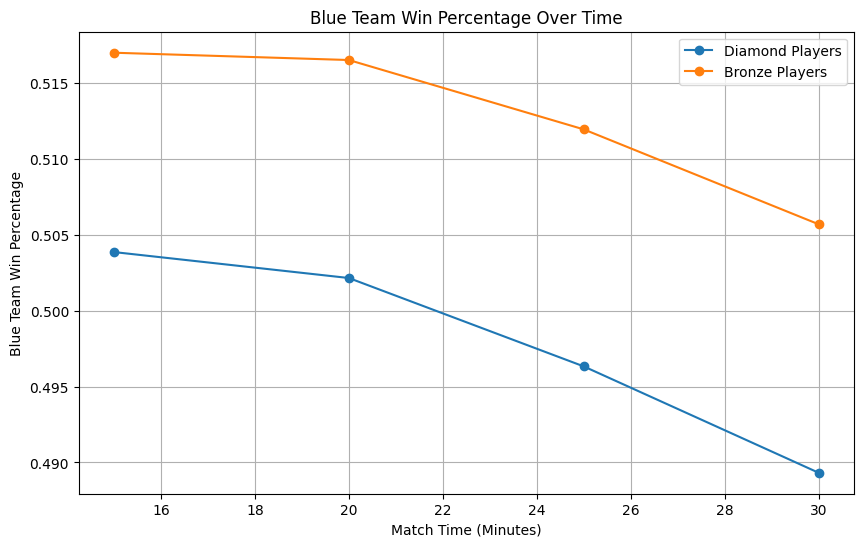

In [ ]:
# plot goes here
plt.figure(figsize=(10, 6))
plt.plot(match_times, blue_win_diamond, label='Diamond Players', marker='o')
plt.plot(match_times, blue_win_bronze, label='Bronze Players', marker='o')
plt.title('Blue Team Win Percentage Over Time')
plt.xlabel('Match Time (Minutes)')
plt.ylabel('Blue Team Win Percentage')
plt.legend()
plt.grid(True)

plt.show()

For both Diamond and Bronze players the percentage that blue wins decreases over time. For Bronze players it appears that the blue team always has an advantage because at 15 minutes the win percentage is over 51.5% and at 30 minutes the win percentage is just above 50.5% so despite the blue team win percentage decreasing over time, the blue team always has a slight advantage. For the Diamond players the blue team does NOT always have an advantage. The win percentage for the blue team with diamond players starts about 50% at the 15 minute mark and is still slightly above at the 20 minute mark, but then at the 25 minute mark the blue teams win percentage drops below 50% and continues to drop all the way below 49% at the minute mark. We can also see from the graph that the blue team win percentage is always higher for the Bronze players than for the Diamond players. These trends lead to evidence that the blue team does not have an advantage amongst Diamond players, but the blue team does have a slight advantage amongst Bronze players.

# Question 2 -- Predicting Winners

Now we want to further investigate how bronze and diamond players differ. Since bronze and diamond players have different skill levels, we think their games might be played differently. For example, maybe "xp" and gold are more important to bronze players and "wards" are more important for diamond players.

Lets build some models to predict the winner of a match using the provided match information. We will investigate a few different phenomena

1. Is it easier to predict the outcome of bronze or diamond league matches?
2. Do different features determine the winner between bronze and diamond league players?

In [ ]:
# as always change the drive to your drive

from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/STAT335/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 2] No such file or directory: '/content/drive/MyDrive/STAT335/'
/content


## Part a  [10 pts]

Lets start with the diamond players. We want to classify if blue team will win (`blue_win == 1`), given match information like xp, gold, wards, etc., at the 15, 20, 25, and 30 minute marks. I.e. we need 4 classification models.


1. Import the diamond player data (done for you)
2. Separate the target variable (blue_win) and the feature matrix (everything else) (done for 15 minutes data, you do the rest).
3. Fit __any__ classification model you like to each dataset.
 - Make sure your model has an out of sample `brier < 0.4` and an `accuracy > 0.65` on the 15 minute data. We dont want to use bad models!
 - You need a variable importance measure, so maybe dont choose nearest neighbors.
 - For logistic regression use the absolute value of the coefficients as variable importance.
 - For decision trees or random forest use the feature_importance_ score.
 - Make sure to fit the same model type at each time time point so that youre results are comparable. I.e. use all logistic regression or all random forests etc. Do not mix and match.

In [ ]:
diamond15 = pd.read_csv('/content/timeline_DIAMOND_15.csv', index_col = 0)
diamond20 = pd.read_csv('/content/timeline_DIAMOND_20.csv', index_col = 0)
diamond25 = pd.read_csv('/content/timeline_DIAMOND_25.csv', index_col = 0)
diamond30 = pd.read_csv('/content/timeline_DIAMOND_30 (1).csv', index_col = 0)

In [ ]:
# 15 minutes
x15 = diamond15.drop(['blue_win'], axis=1)
y15 = diamond15.loc[:,['blue_win']]

x15_train, x15_test, y15_train, y15_test = train_test_split(x15, y15, test_size=0.33, random_state=42)

x15_train = np.array(x15_train)
y15_train = np.array(y15_train)
x15_test = np.array(x15_test)
y15_test = np.array(y15_test)

# recommend keeping a consistent naming scheme

# 20 minutes
x20 = diamond20.drop(['blue_win'], axis=1)
y20 = diamond20.loc[:,['blue_win']]

x20_train, x20_test, y20_train, y20_test = train_test_split(x20, y20, test_size=0.33, random_state=42)

x20_train = np.array(x20_train)
y20_train = np.array(y20_train)
x20_test = np.array(x20_test)
y20_test = np.array(y20_test)

# 25 minutes
x25 = diamond25.drop(['blue_win'], axis=1)
y25 = diamond25.loc[:,['blue_win']]

x25_train, x25_test, y25_train, y25_test = train_test_split(x25, y25, test_size=0.33, random_state=42)

x25_train = np.array(x25_train)
y25_train = np.array(y25_train)
x25_test = np.array(x25_test)
y25_test = np.array(y25_test)
# 30 minutes
x30 = diamond30.drop(['blue_win'], axis=1)
y30 = diamond30.loc[:,['blue_win']]

x30_train, x30_test, y30_train, y30_test = train_test_split(x30, y30, test_size=0.33, random_state=42)

x30_train = np.array(x30_train)
y30_train = np.array(y30_train)
x30_test = np.array(x30_test)
y30_test = np.array(y30_test)

In [ ]:
# define and fit models
def fit_model(x_train, y_train):
    logistic_regression = LogisticRegression()
    logistic_regression.fit(x_train, y_train)
    return logistic_regression

# Fit models for each time period
model_15 = fit_model(x15_train, y15_train)
model_20 = fit_model(x20_train, y20_train)
model_25 = fit_model(x25_train, y25_train)
model_30 = fit_model(x30_train, y30_train)

In [ ]:
# Brier score and accuracy
logistic_test_15 = model_15.predict(x15_test)
logistic_train_15 = model_15.predict(x15_train)
probabilities_15 = model_15.predict_proba(x15_test)
brier_15 = brier_score(y15_test, probabilities_15)
logit_accuracy_test_15 = metrics.classification_report(y15_test, logistic_test_15, output_dict=True)['accuracy']
logit_accuracy_train_15 = metrics.classification_report(y15_train, logistic_train_15, output_dict=True)['accuracy']

print("Brier Score 15 Minutes:")
print(brier_15)
print("\nAccuracy Scores 15 Minutes:")
print(f"Accuracy Test {logit_accuracy_test_15}")
print(f"Accuracy Train {logit_accuracy_train_15}")

Brier Score 15 Minutes:
0.33220180420975043

Accuracy Scores 15 Minutes:
Accuracy Test 0.7529459241323648
Accuracy Train 0.7511379673617047


## Part b  [10 pts]

Compute the brier score and accuracy of each model (4 models in total) on the test set.

1. Compute and print the brier score and accruacy of each model (round to 3 decimal places)
2. Display the brier score and accuracy in a single table. The table should be 4x3. Each row is a time point (15, 20, 25, or 30 minutes). Column 1 is the time point as a string, column 2 is the brier score, column 3 is the accuracy. For example row 1 might look like `15 Minutes, 0.351, 0.825`.
2. We might naively expect that its easier to predict the winner the longer the match goes on. Comment on: Which time period is the hardest to predict? Which time period is the easiest to predict? Do matches become more predictable (better scores) over time? Use the computed Brier and accuracy scores to inform your response.

In [ ]:
# predict if blue wins
y15_hat = model_15.predict(x15_test)
y20_hat = model_20.predict(x20_test)
y25_hat = model_25.predict(x25_test)
y30_hat = model_30.predict(x30_test)

# predict probabilities of blue winning and losing
p15_hat = model_15.predict_proba(x15_test)
p20_hat = model_20.predict_proba(x20_test)
p25_hat = model_25.predict_proba(x25_test)
p30_hat = model_30.predict_proba(x30_test)

In [ ]:
# create brier and accuracy table
# Brier Scores
brier_15 = round(brier_score(y15_test, p15_hat), 3)
brier_20 = round(brier_score(y20_test, p20_hat), 3)
brier_25 = round(brier_score(y25_test, p25_hat), 3)
brier_30 = round(brier_score(y30_test, p30_hat), 3)

# Accuracy
accuracy_15 = round(metrics.classification_report(y15_test, y15_hat, output_dict=True)['accuracy'], 3)
accuracy_20 = round(metrics.classification_report(y20_test, y20_hat, output_dict=True)['accuracy'], 3)
accuracy_25 = round(metrics.classification_report(y25_test, y25_hat, output_dict=True)['accuracy'], 3)
accuracy_30 = round(metrics.classification_report(y30_test, y30_hat, output_dict=True)['accuracy'], 3)

# Table
results = pd.DataFrame({
    'Time Point': ['15 Minutes', '20 Minutes', '25 Minutes', '30 Minutes'],
    'Brier Score': [brier_15, brier_20, brier_25, brier_30],
    'Accuracy': [accuracy_15, accuracy_20, accuracy_25, accuracy_30]
})

print(results)

   Time Point  Brier Score  Accuracy
0  15 Minutes        0.332     0.753
1  20 Minutes        0.284     0.792
2  25 Minutes        0.258     0.816
3  30 Minutes        0.289     0.792


The 15 minute mark shows the highest Brier score and the lowest accuracy, making it the hardest time period to predict which is likely due to less game information being available early in the match. The Matches generally become more predictable over time, as shown by the decreasing Brier scores and increasing accuracy from the 15 minute mark up to the 25 minute mark. This trend suggests that as more match data on things like gold, xp, and wards become available, the model can make more accurate predictions. When we get to the 25 minute mark, we see this is the easiest time period to predict with the lowest Brier score of 0.258 and the highest accuracy of 0.816. Then we snterestingly see that there is a slight increase in the Brier score and a decrease in accuracy at the 30 minute mark compared to the 25 minute mark. So it seems that once the match gets past 25 minutes the predictibility starts to decrease possible due to complexity of late-game scenarios or the balancing out that occurs when matches go on for a while.


## Part c  [10 pts]

Now plot the ROC curve for each model in a single figure. Make sure each line is appropriately labeled.

1. Create a single ROC curve plot
2. Compute and print the AUC values for each model.
3. Based on the AUC values, comment on: Which time period is the hardest to predict? Does that make sense? Which time period is the easiest to predict? Does that make sense? Do matches become more predictable (better scores) over time? Use the computed Brier and accuracy scores to inform your response. Do these results corroborate your findings in part b? Briefly argue these points, a simple "yes" or "no" is insufficient.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr_15, tpr_15, _ = roc_curve(y15_test, p15_hat[:, 1])
roc_auc_15 = auc(fpr_15, tpr_15)

fpr_20, tpr_20, _ = roc_curve(y20_test, p20_hat[:, 1])
roc_auc_20 = auc(fpr_20, tpr_20)

fpr_25, tpr_25, _ = roc_curve(y25_test, p25_hat[:, 1])
roc_auc_25 = auc(fpr_25, tpr_25)

fpr_30, tpr_30, _ = roc_curve(y30_test, p30_hat[:, 1])
roc_auc_30 = auc(fpr_30, tpr_30)

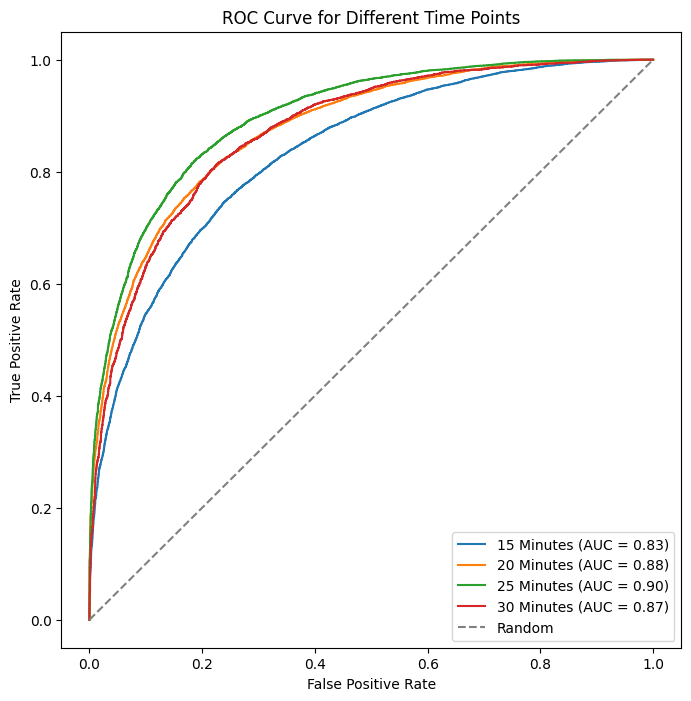

AUC for 15 Minutes: 0.834
AUC for 20 Minutes: 0.878
AUC for 25 Minutes: 0.899
AUC for 30 Minutes: 0.874


In [ ]:
# plot ROC curves
plt.figure(figsize=(8, 8))
plt.plot(fpr_15, tpr_15, label=f'15 Minutes (AUC = {roc_auc_15:.2f})')
plt.plot(fpr_20, tpr_20, label=f'20 Minutes (AUC = {roc_auc_20:.2f})')
plt.plot(fpr_25, tpr_25, label=f'25 Minutes (AUC = {roc_auc_25:.2f})')
plt.plot(fpr_30, tpr_30, label=f'30 Minutes (AUC = {roc_auc_30:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Different Time Points')
plt.legend()
plt.show()

print(f'AUC for 15 Minutes: {roc_auc_15:.3f}')
print(f'AUC for 20 Minutes: {roc_auc_20:.3f}')
print(f'AUC for 25 Minutes: {roc_auc_25:.3f}')
print(f'AUC for 30 Minutes: {roc_auc_30:.3f}')

The time period that is the hardest to predict for this dataset is the 15 minute time period, because it has the lowest AUC score and the worst ROC curve. This makes a lot of sense, because the time period that is the fewest minutes into the actual game should be the most unpreditable. Furthermore, the least amount of time played in the game means there is the most amount of time left for the game to be decided in that time. The easiest time period to predict is the 25 minute time period, because it has the highest AUC score as well as the best ROC curve. This makes sense in many ways but not completely, because what would make complete sense is 30 minutes into the game. However, 25 minutes into the game is still a predictable time interval, due to the fact that there is less time for unpredictable events to affect the final outcome. So, in the end the 25 minute time interval does make sense to be the most predictable time interval.

The data does not fully support that the longer into the game that the players are, the more predictable the final outcome is. Additionally, the brier and accuracy scores above show that the 30 minute time period and the 20 minute time period are not very far apart in prediction abilities. Although the 25 minute period has the highest scores overall, the 30 minute time period does not back it up with good enough numbers to make the generalization that a game is more predictable as time goes on. The scores from part b support all of the results in AUC scores and ROC curves, and therefore also support the prediction abilities of all the time periods. Through all of the brier and accuracy scores as well as AUC scores and ROC curves, it can be inferred that as time goes on matches are slightly more predictable but not fully more predictable in the end.

## Part d  [10 pts]

Now we want to know which features are important for predicting the winner.


1. Print the feature importance of each feature in a table format. Each row should include the feature name and the importance score for each model. Sort this table by the feature importances for the 15 minute mark model.
2. If you used logistic regression use the coefficients (coefs_) as the importance measure
3. If you used decision trees or random forests use the feature importance score (feature_importances_) as the importance measure
4. Comment on: What are the top 5 most important features for predicting the winner of the game at the 15, 20, 25, and 30 minute marks of the match. Are these variables the same? Do any features become more or less important over time? Briefly argue these points, a simple "yes" or "no" is insufficient.

In [ ]:
# create table here
coefficients_15 = model_15.coef_[0]
coefficients_20 = model_20.coef_[0]
coefficients_25 = model_25.coef_[0]
coefficients_30 = model_30.coef_[0]

feature_importance_df = pd.DataFrame({
    'Feature': diamond15.columns[1:, ],
    'Coefficient_15': coefficients_15,
    'Coefficient_20': coefficients_20,
    'Coefficient_25': coefficients_25,
    'Coefficient_30': coefficients_30
})

feature_importance_df_abs = feature_importance_df.copy()
feature_importance_df_abs.iloc[:, 1:] = feature_importance_df_abs.iloc[:, 1:].abs()
feature_importance_df_sorted = feature_importance_df_abs.sort_values(by = 'Coefficient_15', ascending=False)

print(feature_importance_df_sorted)

                Feature  Coefficient_15  Coefficient_20  Coefficient_25  \
3               blue_xp    1.740425e-04    1.361988e-04    1.300956e-04   
6      blue_ward_placed    1.214445e-04    1.337698e-04    9.955306e-05   
1              red_gold    8.998895e-05    7.198555e-05    6.873958e-05   
2             gold_diff    8.405355e-05    6.421320e-05    6.135602e-05   
4                red_xp    6.373944e-05    6.750867e-05    5.049979e-05   
5               xp_diff    5.770502e-05    6.626111e-05    4.905328e-05   
16         first_turret    2.386652e-07    3.197795e-07    2.508005e-07   
0             blue_gold    1.964559e-07    1.790824e-07    2.290273e-07   
14            red_kills    1.204277e-07    1.456485e-07    1.175390e-07   
15            kill_diff    1.182375e-07    1.741309e-07    1.332614e-07   
9   blue_ward_destroyed    4.613004e-08    9.132229e-08    1.051747e-07   
20      first_inhibitor    4.549980e-08    7.459767e-08    1.222032e-07   
12          first_blood  

For the 15 minute model, the top 5 features in order of most importance are blue_xp, blue_ward_placed, red_gold, gold_diff, and red_xp. Now for the 20 minute model, the top 5 features in order of most importance are blue_xp, blue_ward_placed, red_gold, red_xp, and xp_diff. For the 25 minute model, the top 5 features in order of most importance are blue_xp, blue_ward_placed, red_gold, gold_diff, and red_xp. Lastly for the 30 minute model, the top 5 features in order of most importance are blue_xp, blue_ward_placed, gold_diff, red_gold, and red_xp.

Most of these features are the same for each model and almost the same exact order of importance for each model as well. However, as time goes on in the match it seems that gold_diff has a slightly higher importance level for the models. Overall, the 5 features that are shown to be the most important for all models are blue_xp, blue_ward_placed, red_gold, red_xp, and gold_diff.

## Part e  [10 pts]

Now lets build models for the bronze players. Use the same model as you did for diamond players so that the results are comparable. We'll skip through a bit this time. By "same" I mean if you used logistic regression before then use it again. You of course have to refit the models to the bronze data. You should again have 4 models.

1. Compute the brier score and accuracy of each model (4 models in total) on the test set.

2. Display the brier score and accuracy in a single table. The table should be 4x3. Each row is a time point (15, 20, 25, or 30 minutes). Column 1 is the time point as a string, column 2 is the brier score, column 3 is the accuracy.

3. Comment on: Do matches get easier to predict over time? Also are the brier scores for bronze players lower or higher than diamond on average? I.e. is it easier to predict the outcome of a bronze game or a diamond game?

In [ ]:
bronze15 = pd.read_csv('/content/timeline_BRONZE_15.csv', index_col = 0)
bronze20 = pd.read_csv('/content/timeline_BRONZE_20.csv', index_col = 0)
bronze25 = pd.read_csv('/content/timeline_BRONZE_25.csv', index_col = 0)
bronze30 = pd.read_csv('/content/timeline_BRONZE_30.csv', index_col = 0)

In [ ]:
# 15 minutes
x15 = bronze15.drop(['blue_win'], axis=1)
y15 = bronze15.loc[:,['blue_win']]

x15_train, x15_test, y15_train, y15_test = train_test_split(x15, y15, test_size=0.33, random_state=42)

x15_train = np.array(x15_train)
y15_train = np.array(y15_train)
x15_test = np.array(x15_test)
y15_test = np.array(y15_test)

# recommend keeping a consistent naming scheme

# 20 minutes
x20 = bronze20.drop(['blue_win'], axis=1)
y20 = bronze20.loc[:,['blue_win']]

x20_train, x20_test, y20_train, y20_test = train_test_split(x20, y20, test_size=0.33, random_state=42)

x20_train = np.array(x20_train)
y20_train = np.array(y20_train)
x20_test = np.array(x20_test)
y20_test = np.array(y20_test)

# 25 minutes
x25 = bronze25.drop(['blue_win'], axis=1)
y25 = bronze25.loc[:,['blue_win']]

x25_train, x25_test, y25_train, y25_test = train_test_split(x25, y25, test_size=0.33, random_state=42)

x25_train = np.array(x25_train)
y25_train = np.array(y25_train)
x25_test = np.array(x25_test)
y25_test = np.array(y25_test)

# 30 minutes
x30 = bronze30.drop(['blue_win'], axis=1)
y30 = bronze30.loc[:,['blue_win']]

x30_train, x30_test, y30_train, y30_test = train_test_split(x30, y30, test_size=0.33, random_state=42)

x30_train = np.array(x30_train)
y30_train = np.array(y30_train)
x30_test = np.array(x30_test)
y30_test = np.array(y30_test)

In [ ]:
# define and fit models
def fit_model(x_train, y_train):
    logistic_regression = LogisticRegression()
    logistic_regression.fit(x_train, y_train)
    return logistic_regression

# Fit models for each time period
model_15 = fit_model(x15_train, y15_train)
model_20 = fit_model(x20_train, y20_train)
model_25 = fit_model(x25_train, y25_train)
model_30 = fit_model(x30_train, y30_train)

In [ ]:
# predict if blue wins
y15_hat = model_15.predict(x15_test)
y20_hat = model_20.predict(x20_test)
y25_hat = model_25.predict(x25_test)
y30_hat = model_30.predict(x30_test)

# predict probabilities of blue winning and losing
p15_hat = model_15.predict_proba(x15_test)
p20_hat = model_20.predict_proba(x20_test)
p25_hat = model_25.predict_proba(x25_test)
p30_hat = model_30.predict_proba(x30_test)

In [ ]:
# create brier and accuracy table
# Brier Scores
brier_15 = round(brier_score(y15_test, p15_hat), 3)
brier_20 = round(brier_score(y20_test, p20_hat), 3)
brier_25 = round(brier_score(y25_test, p25_hat), 3)
brier_30 = round(brier_score(y30_test, p30_hat), 3)

# Accuracy
accuracy_15 = round(metrics.classification_report(y15_test, y15_hat, output_dict=True)['accuracy'], 3)
accuracy_20 = round(metrics.classification_report(y20_test, y20_hat, output_dict=True)['accuracy'], 3)
accuracy_25 = round(metrics.classification_report(y25_test, y25_hat, output_dict=True)['accuracy'], 3)
accuracy_30 = round(metrics.classification_report(y30_test, y30_hat, output_dict=True)['accuracy'], 3)

# Table
results = pd.DataFrame({
    'Time Point': ['15 Minutes', '20 Minutes', '25 Minutes', '30 Minutes'],
    'Brier Score': [brier_15, brier_20, brier_25, brier_30],
    'Accuracy': [accuracy_15, accuracy_20, accuracy_25, accuracy_30]
})

print(results)

   Time Point  Brier Score  Accuracy
0  15 Minutes        0.330     0.749
1  20 Minutes        0.287     0.792
2  25 Minutes        0.275     0.800
3  30 Minutes        0.278     0.802


For bronze matches, the matches are more predictable as more time is played in the game. This can be seen with the increasing accuracy scores as the time point grows, as well as lower brier scores for the time points of 25 and 30 minutes. On average, the brier scores are very similar for bronze and diamond players, but the bronze players are slightly less predictable for their final outcomes. For the 15 and 30 minute time points the bronze players have lower brier scores, but for the 20 and 25 minute time points the diamond players have lower brier scores. Overall, it is easier to predict diamond player games than bronze player games based on brier and accuraccy scores.

## Part f  [10 pts]

1. Print the feature importance of each feature in a table format. Each row should include the feature name and the importance score for each model. Sort by the feature importances for the 15 minute mark model.
 - If you used logistic regression use the coefficients (coefs_) as the importance measure
 - If you used decision trees or random forests use the feature importance score (feature_importances_) as the importance measure
4. Comment on: What are the top 5 most important features for predicting the winner of the game at the 15, 20, 25, and 30 minute marks of the match. Are these variables the same? Do any features become more or less important over time? How correlated are the feature importances? Use quantitive measures like the correlation matrix to inform your response.
5. Comment on: Are these features the same as the features you found for the diamond players? What, if anything, changed substantially? What are the major similarities and differences between bronze and diamond in terms of feature importance? Briefly argue these points, a simple "yes" or "no" is insufficient.

In [ ]:
# create table here
coefficients_15 = model_15.coef_[0]
coefficients_20 = model_20.coef_[0]
coefficients_25 = model_25.coef_[0]
coefficients_30 = model_30.coef_[0]

feature_importance_df = pd.DataFrame({
    'Feature': bronze15.columns[1:, ],
    'Coefficient_15': coefficients_15,
    'Coefficient_20': coefficients_20,
    'Coefficient_25': coefficients_25,
    'Coefficient_30': coefficients_30
})

feature_importance_df_abs = feature_importance_df.copy()
feature_importance_df_abs.iloc[:, 1:] = feature_importance_df_abs.iloc[:, 1:].abs()
feature_importance_df_sorted = feature_importance_df_abs.sort_values(by = 'Coefficient_15', ascending=False)

correlation_matrix = bronze15.corr()
print(correlation_matrix)

print(feature_importance_df_sorted)

                     duration  blue_gold  red_gold  gold_diff   blue_xp  \
duration             1.000000  -0.096898 -0.045719  -0.032123 -0.010283   
blue_gold           -0.096898   1.000000 -0.283555   0.802021  0.725105   
red_gold            -0.045719  -0.283555  1.000000  -0.800198 -0.381439   
gold_diff           -0.032123   0.802021 -0.800198   1.000000  0.691068   
blue_xp             -0.010283   0.725105 -0.381439   0.691068  1.000000   
red_xp               0.038680  -0.392915  0.729445  -0.700074 -0.199219   
xp_diff             -0.031414   0.724231 -0.714819   0.898171  0.779971   
blue_ward_placed     0.080173   0.093379 -0.059985   0.095762  0.095657   
red_ward_placed      0.075338  -0.068904  0.107230  -0.109883 -0.030931   
ward_placed_diff     0.003802   0.116029 -0.119394   0.146931  0.090609   
blue_ward_destroyed  0.044295   0.029414 -0.000499   0.018707  0.058802   
red_ward_destroyed   0.040065  -0.023374  0.054131  -0.048334  0.004559   
ward_destroyed_diff  0.00

For the 15 minute model, the 5 most important features in order of importance are blue_xp, red_gold, gold_diff, blue_ward_placed, and xp_diff. Now for the 20 minute model, the 5 most important features in order of importance are blue_xp, blue_ward_placed, red_gold, gold_diff, and xp_diff. For the 25 minute model, the 5 most important features in order of importance are blue_xp, blue_ward_placed, gold_diff, red_gold, and xp_diff. Lastly, for the 30 minute model the 5 most important features in order of importance are blue_xp, gold_diff, red_gold, blue_ward_placed, and red_xp. These features are mostly the same for all models, and that includes blue_xp as the most important feature for all models. The main feature that increases in importance over time throughout the models is red_xp. There are very weak correlations among the features overall, but there is a stronger correlation for gold_diff and the other features blue_gold, red_gold, and xp_diff. These inferences are supported with correlation values approximately within less of 0.3 of 1 or -1.

The main difference between the important features of bronze and diamond players is the impact of blue_ward_placed. For diamond players, blue_ward_placed has a slightly higher level of importance throughout all the models then it does for bronze players. Also, the importance level for xp_diff for bronze players is more prominent than its importance level for diamond players. Additionally, the one major similarity among features for bronze and diamond players is that blue_xp is the most important feature for all of them. Overall, the one major difference that is noticable is the impact of xp_diff and red_xp is slightly higher for bronze players compared to diamond players.